In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter

#### Load the (cleaned) data

In [2]:
df = pd.read_csv('../data/fall_2019_cleaned_total_participant_data.csv')

In [3]:
df

,ParticipantName,RecordingDate,MediaName,RecordingTimestamp,FixationIndex,GazeEventType,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),GazePointX (MCSpx),...,EyePosLeftY (ADCSmm),EyePosLeftZ (ADCSmm),EyePosRightX (ADCSmm),EyePosRightY (ADCSmm),EyePosRightZ (ADCSmm),ValidityLeft,ValidityRight,PupilLeft,PupilRight,SaccadeIndex
0,P01,11/4/2019,NaN,12.0,NaN,Unclassified,8.0,NaN,NaN,NaN,...,133.73,589.20,200.72,130.35,591.33,0.0,0.0,5.49,5.38,NaN
1,P01,11/4/2019,NaN,29.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.75,589.23,200.71,130.36,591.30,0.0,0.0,5.49,5.38,NaN
2,P01,11/4/2019,NaN,46.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.75,589.19,200.70,130.34,591.16,0.0,0.0,5.48,5.39,NaN
3,P01,11/4/2019,NaN,62.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.73,589.12,200.70,130.32,591.12,0.0,0.0,5.49,5.38,NaN
4,P01,11/4/2019,NaN,79.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.68,588.97,200.72,130.33,591.22,0.0,0.0,5.47,5.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709812,P29,12/6/2019,NaN,730976.0,NaN,Saccade,50.0,NaN,NaN,NaN,...,148.53,642.53,205.62,152.71,641.67,0.0,0.0,4.25,3.94,2294.0
1709813,P29,12/6/2019,NaN,730993.0,NaN,Saccade,50.0,NaN,NaN,NaN,...,148.64,642.97,206.17,152.90,642.30,0.0,0.0,4.33,3.97,2294.0
1709814,P29,12/6/2019,NaN,731010.0,NaN,Saccade,50.0,NaN,NaN,NaN,...,148.76,643.35,206.63,153.07,642.97,0.0,0.0,4.30,3.97,2294.0
1709815,P29,12/6/2019,NaN,731026.0,NaN,Unclassified,25.0,NaN,NaN,NaN,...,148.62,642.96,206.69,152.96,642.69,0.0,0.0,4.37,4.00,NaN


### Get the data types just right

#### Fill nan with np.nan 
This doesn't appear to do anything :(

In [4]:
df.fillna(np.nan, inplace=True)

#### Convert 'Gaze Event Types' to Numbers

In [5]:
print(df['GazeEventType'].unique())

gaze_event_legend = {'Unclassified': np.nan, 'Saccade': 0, 'Fixation': 1}

df['GazeEventType'] = df['GazeEventType'].map(lambda entry: gaze_event_legend[entry])

['Unclassified' 'Fixation' 'Saccade']


#### Convert 'Participant Name' to ID number

In [6]:
df.ParticipantName.unique()

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P22', 'P17', 'P18',
       'P20', 'P21', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29'],
      dtype=object)

In [7]:
participant_id_legend = {par: int(par[1:]) for par in df.ParticipantName.unique()}

df['ParticipantName'] = df['ParticipantName'].map(lambda entry: participant_id_legend[entry])

df.rename(columns={'ParticipantName': 'ID'}, inplace=True)

#### Data types look good

In [8]:
df.dtypes

ID                          int64
RecordingDate              object
MediaName                  object
RecordingTimestamp        float64
FixationIndex             float64
GazeEventType             float64
GazeEventDuration         float64
FixationPointX (MCSpx)    float64
FixationPointY (MCSpx)    float64
GazePointX (MCSpx)        float64
GazePointY (MCSpx)        float64
DistanceLeft              float64
DistanceRight             float64
EyePosLeftX (ADCSmm)      float64
EyePosLeftY (ADCSmm)      float64
EyePosLeftZ (ADCSmm)      float64
EyePosRightX (ADCSmm)     float64
EyePosRightY (ADCSmm)     float64
EyePosRightZ (ADCSmm)     float64
ValidityLeft              float64
ValidityRight             float64
PupilLeft                 float64
PupilRight                float64
SaccadeIndex              float64
dtype: object

### Drop the NaN Media Names
These are confirmed (in the below cell) to be the tiny intervals of time before and after the media show up on the screen 

In [9]:
parID = np.random.choice(df.ID.unique())
# This is the only way to get the NaN
print(df.loc[df.MediaName != df.MediaName].loc[
    df.ID == parID].RecordingTimestamp.diff().to_list())

[nan, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 42318.0, 16.0, 17.0, 17.0, 16.0, 55076.0, 16.0, 17.0, 216639.0, 16.0, 17.0, 17.0, 202565.0, 16.0, 17.0, 17.0, 166243.0, 17.0, 16.0, 41503.0, 16.0, 23366.0, 17.0, 17.0, 16.0, 212308.0, 17.0, 17.0, 148589.0, 17.0, 17.0, 417.0, 15.0, 17.0, 16.0, 417.0, 16.0, 17.0, 17.0, 16.0, 468.0, 16.0, 17.0, 849.0, 16.0, 2249.0, 16.0, 17.0, 816.0, 17.0, 17.0, 16.0, 716.0, 17.0, 17.0, 

In [10]:
# Collisions of NaN MediaName and NaN ParticipntName
df.loc[(df.MediaName != df.MediaName) & (df.ID != df.ID)].size

0

In [11]:
df = df.loc[df.MediaName == df.MediaName]

In [12]:
# Drop the first three participant data, because 
# we started switching immediately to the next stimulus
# from the fourth participant
df = df.loc[~df.ID.isin([1, 2, 3])]

### Drop the skipped trials/phases

In [13]:
grouped_timestamp = df.groupby(['ID', 'MediaName'])

In [14]:
grouped_timestamp_series = pd.Series(grouped_timestamp.RecordingTimestamp.max(
                        ) - grouped_timestamp.RecordingTimestamp.min())

In [15]:
pd.DataFrame(grouped_timestamp_series)

RecordingTimestamp
ID MediaName                                  
4  6_anagram_123456_1.tiff             33758.0
   6_anagram_123456_2.tiff             16138.0
   anagram_AECJKT.tiff                  1382.0
   anagram_ATEYRB.tiff                216422.0
   anagram_DIEMAR.tiff                214924.0
...                                        ...
29 anagram_PEOWR.tiff                   4196.0
   anagram_RCTUO.tiff                   5929.0
   anagram_REABYT.tiff                165344.0
   anagram_RNOBW.tiff                   4697.0
   anagram_TDMSOE.tiff                 95546.0

[378 rows x 1 columns]

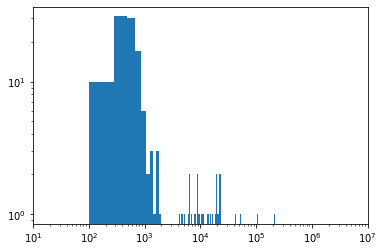

In [16]:
plt.hist(list(dict(grouped_timestamp_series).values()), bins=5_000);
plt.yscale('log')
plt.xscale('log')
plt.xlim(10, 1_000_0000);

In [17]:
pd.set_option('display.max_rows', 50)
grouped_timestamp_series.sort_values()[90:130]

ID  MediaName              
11  anagram_PMEKUA.tiff          883.0
15  anagram_UPATEN.tiff          949.0
17  anagram_AEKUMP.tiff          966.0
23  anagram_TOSMDE.tiff          983.0
26  anagram_MPKUAE.tiff         1082.0
10  anagram_EMDSTO.tiff         1099.0
22  anagram_PMUKAE.tiff         1349.0
9   anagram_NAUETP.tiff         1366.0
4   anagram_AECJKT.tiff         1382.0
5   anagram_EATYBR.tiff         1433.0
12  anagram_PMEAUK.tiff         1633.0
15  6_anagram_123456_2.tiff     1665.0
11  anagram_TRBYEA.tiff         1782.0
21  Black Screen.jpg            1882.0
29  anagram_PEOWR.tiff          4196.0
21  6_anagram_123456_2.tiff     4530.0
29  anagram_RNOBW.tiff          4697.0
11  anagram_BNRWO.tiff          5329.0
29  anagram_RCTUO.tiff          5929.0
9   anagram_BOWRN.tiff          6395.0
29  anagram_DWLEFA.tiff         6428.0
10  anagram_NBWRO.tiff          6812.0
29  anagram_HLCKA.tiff          6878.0
11  anagram_PRWOE.tiff          7694.0
23  anagram_HKACL.tiff          7961

#### Keep media of more than 2 seconds (not skipped)

In [18]:
df = grouped_timestamp.filter(lambda x: 
        x.RecordingTimestamp.max() - x.RecordingTimestamp.min() > 2000)

### Quick check on how the coordinates look

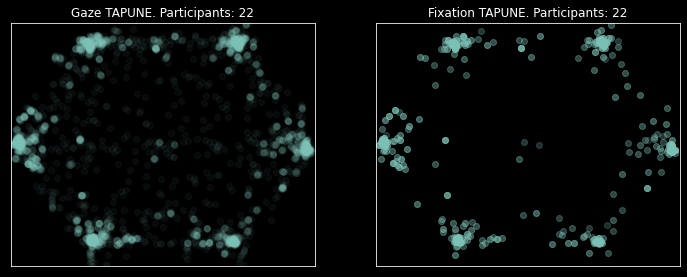

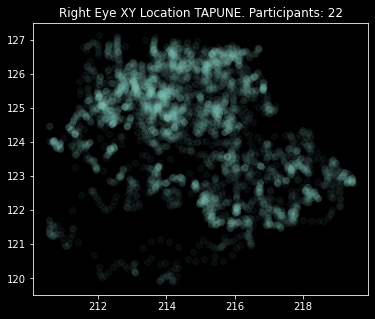

In [60]:
m = np.random.choice(df.MediaName.unique())
dfm = df.loc[df.MediaName == m]
title_rest = m.rstrip('.tiff').lstrip('anagram_') + \
            '. Participants: ' + ', '.join([str(v) for v in dfm.ID.unique().tolist()])

plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(dfm['GazePointX (MCSpx)'], 1024 - dfm['GazePointY (MCSpx)'], alpha=0.05)
ax1.set(xlim=(0, 1280), ylim=(1, 1024), xticks=(), yticks=(), 
        title='Gaze ' + title_rest)
ax1.set_aspect('equal', adjustable='box')
ax2.scatter(dfm['FixationPointX (MCSpx)'], 1024 - dfm['FixationPointY (MCSpx)'], alpha=0.05)
ax2.set(xlim=(0, 1280), ylim=(1, 1024), xticks=(), yticks=(), 
        title='Fixation ' + title_rest)
ax2.set_aspect('equal', adjustable='box')
plt.show()
plt.figure(figsize=(6, 6))
plt.title('Right Eye XY Location ' + title_rest)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(dfm['EyePosRightX (ADCSmm)'],dfm['EyePosRightY (ADCSmm)'], alpha=0.05)
plt.show()

In [20]:
# plt.style.use('dark_background')
# for m in df.MediaName.unique():
#     dfm = df.loc[df.MediaName == m]
#     plt.figure(figsize=(12, 12))
#     plt.xlim(0, 1280)
#     plt.ylim(0, 1024)
#     plt.title(m.rstrip('.tiff').lstrip('anagram') + 
#               ' Participants: ' + ' '.join([str(v) for v in dfm.ID.unique().tolist()]))
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.scatter(dfm['GazePointX (MCSpx)'], 1024 - dfm['GazePointY (MCSpx)'], alpha=0.05)
# #     plt.savefig('gaze_points/' + m + '.png', dpi=200)
#     plt.show()

### Combine participant and media to get each unique phase
Combine participant-media to get each unique trial/calibration/break image (call it phase). 
And make `MediaName` a bit more digestible as well.

In [21]:
def strip_media(entry):
    return entry.lstrip('6_anagram_').lstrip('5_anagram_'
            ).lstrip('anagram_').rstrip('.jpg').rstrip('.tiff'
            ).replace(' Screen', '_Screen')

In [22]:
df.MediaName = df.MediaName.map(strip_media)

In [23]:
df = df.assign(Phase = df.ID.astype('str') + '_' + df.MediaName)

### Normalize measurements to each phase
Normalize `RecordingTimestamp`, `FixationIndex`, `SaccadeIndex` to each unique phase.
Without parallelization with `swifter`, runtimes are ~40 seconds for each `apply`. The parallelized runtimes may be different for you depending on the number of cores on your machine. 

In [25]:
phase_min_timestamp = dict(df.groupby('Phase').RecordingTimestamp.min())

In [38]:
%%time
df = df.assign(Timestamp = df.swifter.allow_dask_on_strings().apply(lambda row: 
            row['RecordingTimestamp'] - phase_min_timestamp[row['Phase']], 
                 axis=1))


CPU times: user 2.29 s, sys: 991 ms, total: 3.28 s
Wall time: 10.2 s


In [41]:
phase_min_fixation_index = dict(df.groupby('Phase').FixationIndex.min())

In [50]:
%%time
# add 1 so that it starts with 1 (first fixation detected) not 0 for each phase
df = df.assign(FixationNumber = df.swifter.allow_dask_on_strings().apply(lambda row: 
            row['FixationIndex'] - phase_min_fixation_index[row['Phase']] + 1, 
                 axis=1))


CPU times: user 2.44 s, sys: 955 ms, total: 3.39 s
Wall time: 11.1 s


In [54]:
phase_min_saccade_index = dict(df.groupby('Phase').SaccadeIndex.min())

In [55]:
%%time
# add 1 so that it starts with 1 (first saccade detected) not 0 for each phase
df = df.assign(SaccadeNumber = df.swifter.allow_dask_on_strings().apply(lambda row: 
            row['SaccadeIndex'] - phase_min_saccade_index[row['Phase']] + 1, 
                 axis=1))


CPU times: user 2.35 s, sys: 1.03 s, total: 3.37 s
Wall time: 10.3 s


In [58]:
# Drop the columns normalized to the overall recording
df = df.drop(columns={'RecordingTimestamp', 'FixationIndex', 'SaccadeIndex'})

### Next Steps
* Combine participant-media to get each unique trial/calibration/break image (call it phase) **Done**
* Normalize `RecordingTimestamp`, `FixationIndex`, `SaccadeIndex` to each unique phase **Done**
* Convert to xy from bottom left (do the same with the coordinates of the letters)
* Get polar coordinates to nearest letter, and column with that letter is going clockwise from left


The coordinates for the five and six letter words are provided. They're listed as [x, y] where x and and y are
measured from the top left corner of the screen. The coordinates are provided in clockwise direction from left middle
such that they align with the entries in the 'MediaName' column. For example, if the MediaName is 'anagram_PWROE.tiff'
then the coordinate for the letter P is [32, 507], the coordinate for W is [451, 44], R is [1131, 222], etc.
The same thing for the six letter words.

In [24]:
five_letter_coordinates = [[32, 507], [451, 44], [1131, 222], 
                           [1132, 793], [450, 971]]
six_letter_coordinates = [[35, 509], [335, 87], [943, 87], 
                          [1245, 509], [944, 928], [334, 928]]